# **[OK]**

In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.models import Sequential

data = pd.read_csv('../../data/nama-gender-titik.csv', sep=";")
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'f' else 0)
names = data[['nama', 'gender']].values.tolist()

def name_to_sequence(name):
    char_to_int = dict((c, i) for i, c in enumerate('abcdefghijklmnopqrstuvwxyz '))
    sequence = [char_to_int[char.lower()] for char in name if char.lower() in char_to_int]
    return sequence

def name_to_vector(name):
    sequence = name_to_sequence(name)
    vector = pad_sequences([sequence], maxlen=29, padding='post')[0]
    return vector

In [25]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [26]:
x_train = np.array([name_to_vector(name[0]) for name in names])
y_train = np.array([name[1] for name in names])

In [5]:
model = Sequential()
model.add(Embedding(input_dim=27, output_dim=64, input_length=29))
model.add(LSTM(units=64))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
hist = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10


2023-04-24 02:49:04.492032: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


15606/15606 [==============================] - 290s 18ms/step - loss: 0.2299 - accuracy: 0.9013 - val_loss: 0.2369 - val_accuracy: 0.9023
Epoch 2/10
15606/15606 [==============================] - 267s 17ms/step - loss: 0.1347 - accuracy: 0.9478 - val_loss: 0.2030 - val_accuracy: 0.9151
Epoch 3/10
15606/15606 [==============================] - 252s 16ms/step - loss: 0.1178 - accuracy: 0.9546 - val_loss: 0.1867 - val_accuracy: 0.9241
Epoch 4/10
15606/15606 [==============================] - 257s 16ms/step - loss: 0.1090 - accuracy: 0.9580 - val_loss: 0.1871 - val_accuracy: 0.9241
Epoch 5/10
15606/15606 [==============================] - 254s 16ms/step - loss: 0.1033 - accuracy: 0.9603 - val_loss: 0.1739 - val_accuracy: 0.9298
Epoch 6/10
15606/15606 [==============================] - 257s 16ms/step - loss: 0.0988 - accuracy: 0.9622 - val_loss: 0.1705 - val_accuracy: 0.9320
Epoch 7/10
15606/15606 [==============================] - 255s 16ms/step - loss: 0.0955 - accuracy: 0.9636 - val_loss

In [7]:
model.save('../../models/gender-lstm-base.h5')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 29, 64)            1728      
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 51,649
Trainable params: 51,649
Non-trainable params: 0
_________________________________________________________________


In [11]:
score = model.evaluate(x_train, y_train, batch_size=64)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

9754/9754 [==============================] - 71s 7ms/step - loss: 0.1010 - accuracy: 0.9612

ACCURACY: 0.9612137079238892
LOSS: 0.10103032737970352


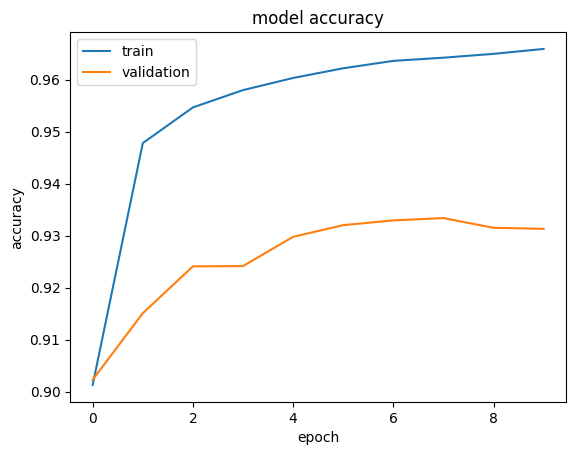

In [12]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

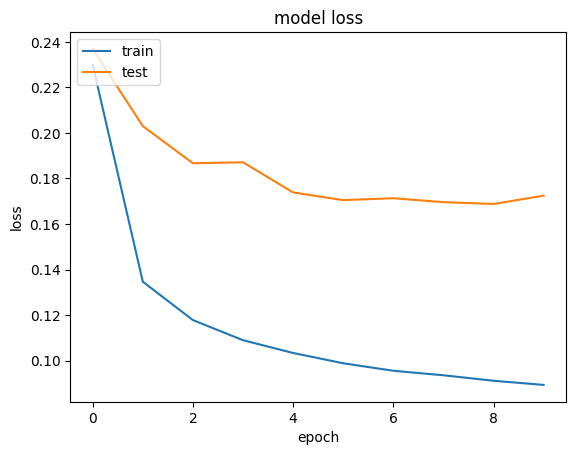

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
import numpy as np
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score

labels_pred = model.predict(x_train)
labels_pred = np.round(labels_pred.flatten())
accuracy = accuracy_score(y_train, labels_pred)
print("Accuracy: %.2f%%" % (accuracy*100))

19508/19508 [==============================] - 98s 5ms/step
Accuracy: 96.12%


In [19]:
print(classification_report(y_train, labels_pred, digits=5))

NameError: name 'classification_report' is not defined

In [1]:
import tensorflow as tf
import numpy as np
    
model = tf.keras.models.load_model('../../models/gender-lstm-base.h5')

def name_to_vector(name):
    sequence = name_to_sequence(name)
    vector = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=29, padding='post')[0]
    return vector

def name_to_sequence(name):
    char_to_int = dict((c, i) for i, c in enumerate('abcdefghijklmnopqrstuvwxyz '))
    sequence = [char_to_int[char.lower()] for char in name if char.lower() in char_to_int]
    return sequence
    
def predict_gender(name):
    name_vector = np.array(name_to_vector(name))
    padded_name_vector = tf.keras.preprocessing.sequence.pad_sequences([name_vector], maxlen=29, padding='post', truncating='post')
    prediction = model.predict(padded_name_vector)
    
    if prediction < 0.5:
        return 'Male'
    else:
        return 'Female'

nama = [
    'Novi', 
    'Novia Kumala Sari', 
    'Novianto Rahmadi', 
    'Melani', 
    'Malik', 
    'Melani Malik', 
    'Annisa', 
    'Annisa Rahmadi', 
    'Annisa Rahma Adi',
    'Putra Saputri', 
    'Putri Saputra', 
    'Rizki Saputri', 
    'Dwi Syafutra', 
]

for i in nama:
    print(i + ' = ' + predict_gender(i))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-04-28 10:14:21.268476: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 1s 573ms/step
Novi = Female
1/1 [==============================] - 0s 17ms/step
Novia Kumala Sari = Female
1/1 [==============================] - 0s 16ms/step
Novianto Rahmadi = Male
1/1 [==============================] - 0s 16ms/step
Melani = Female
1/1 [==============================] - 0s 15ms/step
Malik = Female
1/1 [==============================] - 0s 14ms/step
Melani Malik = Female
1/1 [==============================] - 0s 14ms/step
Annisa = Female
1/1 [==============================] - 0s 14ms/step
Annisa Rahmadi = Female
1/1 [==============================] - 0s 14ms/step
Annisa Rahma Adi = Female
1/1 [==============================] - 0s 14ms/step
Putra Saputri = Female
1/1 [==============================] - 0s 15ms/step
Putri Saputra = Male
1/1 [==============================] - 0s 14ms/step
Rizki Saputri = Female
1/1 [==============================] - 0s 13ms/step
Dwi Syafutra = Male


In [13]:
%pip install visualkeras pydot

Note: you may need to restart the kernel to use updated packages.


In [21]:
import tensorflow as tf
from keras.utils.vis_utils import plot_model
    
model = tf.keras.models.load_model('../../models/gender-lstm-base.h5')
plot_model(model, to_file='../../assets/model-cnn.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [28]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('../../data/nama-gender-titik.csv', sep=";")
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'f' else 0)
names = data[['nama', 'gender']].values.tolist()

x_train = np.array([name_to_vector(name[0]) for name in names])
y_train = np.array([name[1] for name in names])

model = tf.keras.models.load_model('../../models/gender-lstm-base.h5')
labels_pred = model.predict(x_train)
labels_pred = np.round(labels_pred.flatten())
cm = confusion_matrix(y_train, labels_pred)

plt.figure(figsize=(5,4))
fx = sns.heatmap(cm, annot=True, fmt=".0f", cmap="Greens")
fx.set_title('LSTM-Based \n');
fx.set_xlabel('\n Predicted \n')
fx.set_ylabel('Actual \n');
fx.xaxis.set_ticklabels(['Female','Male'])
fx.yaxis.set_ticklabels(['Female','Male'])
plt.show()

19508/19508 [==============================] - 104s 5ms/step


array([[311869,  10667],
       [ 13554, 288145]])

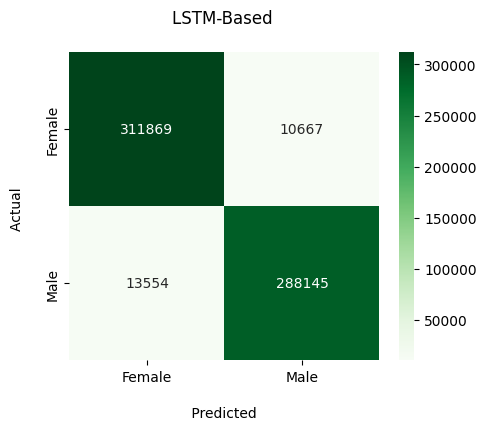

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
fx = sns.heatmap(cm, annot=True, fmt=".0f", cmap="Greens")
fx.set_title('LSTM-Based \n');
fx.set_xlabel('\n Predicted \n')
fx.set_ylabel('Actual \n');
fx.xaxis.set_ticklabels(['Female','Male'])
fx.yaxis.set_ticklabels(['Female','Male'])
plt.show()